In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pylab import plot,show,hist
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm, chi2_contingency
import statsmodels.api as sm
from numpy import linspace,hstack
from pylab import plot,show,hist
import pydot
#%config InlineBackend.figure_format = 'svg' для большей четкости графиков
matplotlib.style.use('ggplot')
%matplotlib inline

#Стандартизация данных
from sklearn import preprocessing

#Для построения диаграмм рассеивания
from pandas.plotting import scatter_matrix

#Иерархический кластерный анализ
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#Кластерный анализ методом К-средних
from sklearn.cluster import KMeans

#Линейная регрессия
from sklearn.linear_model import LinearRegression

#Расщепление на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

#Деревья решений для задачи классификации
from sklearn.tree import DecisionTreeClassifier

#Деревья решений для задач регрессии 
from sklearn.ensemble import RandomForestClassifier

#XGBoost
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.calibration import CalibratedClassifierCV

#Нейронные сети
from keras.models import Sequential #тип сети
from keras.layers import Dense #метод соединения слоев
from keras.utils import np_utils #обработка данных под Керас
from keras import optimizers
from keras import initializers


columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

os.chdir(r'C:\Users\Mr Alex\Documents\GitHub\FlightPreparence')
data = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False)
town = pd.read_csv('town_1959_2.csv', header = 0,)
df = pd.read_csv('swiss_bank_notes.csv', index_col=0)
beer = pd.read_csv('beverage_r.csv', sep=";", index_col='numb.obs')
food = pd.read_csv('Protein Consumption in Europe.csv', sep=';', decimal=',', index_col='Country')
ass = pd.read_csv('assess.dat', sep='\t', index_col='NAME')
albi = pd.read_csv('Albuquerque Home Prices_data.txt', sep='\t')
noble = pd.read_csv('agedeath.dat.txt', sep='\s+', header=None, names=['group', 'age', 'index'])
inter = pd.read_csv('interference.csv')
diamond = pd.read_csv('diamond.dat', header=None, sep='\s+', names=['weight', 'price'])
cred = pd.read_csv('Credit.csv', sep=';', encoding='cp1251')
test = pd.read_csv('adult.test', header=None, names=columns, na_values=' ?', skiprows=1)
wine = pd.read_csv('Wine.txt', sep='\t', header=0)
sales = pd.read_csv('monthly-car-sales-in-quebec-1960.csv', sep=';', header=0, parse_dates=[0])

In [2]:
def two_histograms(x, y):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])
    
def regression_coef(model, X, y):
    """
    Функция для определения статистической значимости регрессионных коэффициентов
    """
    coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
    X1 = np.append(np.ones((len(X),1)), X, axis=1)
    b = np.append(model.intercept_, model.coef_)
    MSE = np.sum((model.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
    var_b = MSE * (np.linalg.inv(np.dot(X1.T, X1)).diagonal())
    sd_b = np.sqrt(var_b)
    t = b / sd_b
    coef['pvalue'] = [2 * (1 - stats.t.cdf(np.abs(i), (len(X1) - 1))) for i in t]
    return coef

In [ ]:
#Классификация - приписание объекта к классу на основании ключевой (группирующей) переменной или совокупности его характеристик
#Типы переменных. Количественные(непрерывные, дискретные). Номинальные (несравниваемые). Ранговые (порядковые)
#Гистограмма частот - форма распределения количественного признака
#Описательная статистика. Меры центральной тенденции. Меры изменчивости (Размах - Xmax-Xmin)
#МЦТ. Мода - самый частый признак. Медиана - делит упорядоченное множество пополам. Среднее (Математическое ожидание, EX)
#Дисперсия D - средний квадрат отклонений индивидуальных значений от средней величины. С ростом n, дисперсия сокращается
#D = сумма(Xинд - Xсред)**2/n-1. Хсред генеральной совокупности обозначается как мю, М
#Стандартное отклонение, "сигма", sd = D**0.5

In [ ]:
#Нормальное распределение. Унимодально и симметрично 
#Центральная предельная теорема. Для выборок стандартная ошибка среднего se=SDинд/n**0.5, где n - число элементов выборки
#Если n выборка репрезентативная и число элементов > 30, то se=0.5
#Интервал для поиска М генеральной совокупности(доверительный интервал): для 95% выборок Хсред ± 1.96*se включат в себя М

In [ ]:
#Число наблюдений(N1), попавших в столбец. H = C*N1 
#H = N1/(N*длина интервала) - в таком случае гистограмма будет вероятностной, то есть в пределах единицы
#Плотность распределения f(x) позволяет рассчитать вероятность P(A) попаданий в определенный интервал
#В гистограмме наибольший вес имеет площадь столбца
data['SalePrice'].hist(bins=60)

In [ ]:
#Гистограмма нужна чтобы оценить одну группу
#Вероятностная гистограмма 
data['SalePrice'].hist(density=True, bins=60)

In [ ]:
#Ядерная оценка плотности Скотта-Сильвермана - обобщение гистограммы F(t) = (1/n*h)*сумма всех наблюдений K(t-Xi/h)
#Распределение Японечникова определяет плотность К - симметричная, неотрицательная, с интегралом=1
my_density = gaussian_kde(data['SalePrice'], bw_method = 1) #Метод определяет меру сглаживания
x = linspace(min(data['SalePrice']), max(data['SalePrice']),1000)
plot(x, my_density(x),'g') #распределение функции
hist(data['SalePrice'], density=True, alpha=.3) 
show()

In [ ]:
#Для сравнения нескольких групп можно сложить гистограммы 
df.groupby('Status')['Length'].plot.hist(alpha=.6)
plt.legend()
#Но лучше использовать box-plot. Усы - 1,5 межквартиля. Outlies - 3. Extremes - дальше.
#Внимательно смотрим на число наблюдений в каждой из выборок, чтобы проанализировать boxplot
data['MS Zoning'].value_counts()
ax=data.boxplot(column='SalePrice', by='MS Zoning')
ax.get_figure().suptitle('')

In [ ]:
#Для определения "типичного" объекта совокупности можно использовать среднее(если нет выбросов) или медиану(если есть)
#При неравномерном распределении можно убрать выбросы
town_2 = town.iloc[2:1004]
#Или логарифмировать переменную (для лог-нормального распределения)
x = np.log10(town[u'население'])
pd.Series(x).hist(bins=45)
#Усеченное среднее. Выбрасывается 2,5% самых малых и 2,5% наибольших значений переменной. Для новой БД считается среднее
exclude = int(len(town)/100*2.5)
redacted_town = town[exclude:len(town)-exclude]


In [ ]:
#Для получения комплексного сравнения объектов по нескольким переменным
#Диагональ показывает ядерную оценку плотности
#Матрица состоит из диаграмм рассеивания
colors = {'genuine': 'green', 'counterfeit': 'red'}
scatter_matrix(df,
               # размер картинки
               figsize=(6, 6),
               # плотность вместо гистограммы на диагонали
               diagonal='kde',
               # цвета классов
               c=df['Status'].replace(colors),
               # степень прозрачности точек
               alpha=0.2,
              )

In [ ]:
#В случае очевидного смешения двух нормальных распределений, можно оценить их более подробно
df.groupby('Status')['Diagonal'].plot.hist(alpha=0.6)
plt.legend(loc='upper left')

#Для сравнения параметров важно их нормализовать
data.groupby('MS Zoning')['SalePrice'].plot.hist(density=True)
plt.legend()

#Если рассевание нельзя разделить линейно, то меняем точку начала координат и выбираем новые параметры для разделения

In [ ]:
#Иерархический кластерный анализ разделяет объекты на группы (стратификация). Число групп заранее неизвестно
#Кластерный анализ позволяет сократить число наблюдений и проинтерпретировать их
#Схожесть внутри кластера отображается как расстоянием между близкими объектами на диаграмме кластеров
#Расстояние можно рассчитать методами: Евклида(или квадрата Евклида), Блок(Манхеттен), Хэмминга(для слов) и тд.
#Манхеттен предпочтительнее, когда нет больших различий в рандомных переменных, потому что вес аномалий тогда меньше
#Расстояние между кластерами рассчитывается:
#Метод Варда (WARD) - позволяет работать с шаровыми скоплениями
#Метод ближайших соседей (позволяет определять ленточные кластеры)
#Средневзвешенное расстояние: среднее для суммы всех расстояний (также для ленточных)
#Центроид: расстояние между кластерами равно расстоянию между их центрами тяжести
#Методы дальнего и ближайшего соседа: расстояние между самыми дальними\близкими объектами есть межкластер
#Метод расстояния Sorencen-Dice Q = 2*|A^B|/|A|+|B|. Не работает если множества слабо пересекаются

In [ ]:
#Алгоритмы кластерного анализа. Объекты группируются с ближайшими, пока нет скачка в расстояниях для следующего слияния
#Момент для прекращения слияния определяется дендрограммой (для умеренного числа объектов)
#Каменистая осыпь/локоть показывают скачок (резкий взлет графика) шагов объединений, когда кластеризуются тысячи объектов
#Задача аналитика: отобрать переменные, выбрать метод стандартизации, установить расстояние между кластерами и между объектами 

In [ ]:
#Объект, в котором будет хранится информация о последовательном слиянии кластеров
#Для функции нужен фрейм, метод межкластера и метод межобъектов
link = linkage(beer, 'ward', 'euclidean')

In [ ]:
#link - матрица (n-1) x 4, где n - число наблюдений. 
#Каждая строка - результат слияния очередной пары кластеров с номерами link[i, 0] и link[i, 1]. 
#Новому кластеру присваивается номер n + i 
#link[i, 2] означает расстояние между слитыми кластерами, а link[i, 3] - размер нового кластера.
link[:5]

In [ ]:
#Построение дендрограммы
dn = dendrogram(link, orientation='right')

In [ ]:
#Ключевые характеристики кластеров
#В колонку cluster запишем номер кластера объекта с помощью функции fcluster. 
#Аргументы: linkage, пороговое значение для межкластера (либо число кластеров), criterion: distance для остановки разбиения 
# Останавливаем объединение, если расстояние между кластерами превышает 3
beer['cluster'] = fcluster(link, 3, criterion='distance')
#Доля объектов в кластере, которые имеют соответствующие характеристики
beer.groupby("cluster").mean()

In [ ]:
#Кластерный анализ методом К-средних
#инициализация модели
model = KMeans(n_clusters=2, random_state=42) #random_state - зерно датчика случайных чисел. Для воспроизводимости результата 
#При каждом новом вызове с одинаковыми random_state модель будет давать одинаковые результаты

In [ ]:
#подгонка модели по данным из БД
model.fit(beer)

#Результат кластеризации на данных из БД
model.labels_

#координаты центров кластеров
model.cluster_centers_

#Добавление в кластер данных. Предсказание для новых наблюдений. Метод predict
new_items = [
    [1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0]
]
model.predict(new_items)

In [ ]:
#Число кластеров можно определить через график локтя для для разного числа кластеров
#Метод inertia_ вернёт сумму расстояний от каждой точки данных до центра ближайшего у ней кластера 
#Кластеризацию можно считать условно хорошей, когда инерция перестаёт сильно уменьшаться при увеличении числа кластеров
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state=42).fit(beer) for k in K]
dist = [model.inertia_ for model in models]

#График локтя
plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# В колонке NR находится номер объекта, его нужно исключить из данных для кластеризации
del ass['NR']

#Оптимизируем модель, меняя число задаваемых кластеров на основании графика локтя
model = KMeans(n_clusters=4, random_state=42)
model.fit(ass)
ass['cluster'] = model.labels_
ass.groupby('cluster').mean()

#Смотрим к какому кластеру какие объекты относятся
ass['cluster'].sort_values()

In [ ]:
#Проверка статистических гипотез:
#Гипотеза согласия. Совпадает рандомная функция распределения с нормальным распределением? Самый дешевый и простой вариант
#Гипотеза согласия2. Гипотеза об экспоненциальности распределения. Нужна, когда есть переменная времени ожидания
#Гипотеза однородности. Совпадают две рандомные функции распредления? Например, чтобы сравнить данные до и после события
#Гипотеза независимости. Нулевая гипотеза для рандомных объектов. Проверяется через коэффициент корреляции (скаляры) 
#Гипотеза о параметре распределения. Определение ключевых параметров. Например одинаковые средние или медианы.

In [ ]:
#Альфа-это уровень значимости(0.05, 0.01. 0.005). Определеяет число ошибок первого рода. На второго рода влияет размер выборки
#Т- это статистика критерия. Если T<Cальфа, то верна нулевая гипотеза
#Cальфа- это критическое значение. Вероятность отвергнуть правильную гипотезу(T>C) не должна превышать А(альфа)
#p-value показывает насколько часто статистика критерия в верной гипотезе будет превышать реальные значения p=P{T>Tэксп}
#Если p<A, гипотезу отвергаем. Если p>A, гипотезу не отвергаем. Проверяются все условия, при которых критерий будет работать

In [ ]:
#Тесты Колмогорова-Смирнова и Shapiro-Wilk позволяют проверить выборку на принадлежность к ГС и нормальность распредеелния

#Применяем критерий Шапиро-Вилка после логарифмирования. 
town = town.set_index(u'номер')
plt.hist(np.log10(town[u'население']), bins=50)
res = stats.shapiro(np.log10(town[u'население']))
print('p-value: ', res[1])
#P очень маленькое, поэтому гипотезу о нормальности отвергаем. 
#Отклонения от нормальности будут несущественны, если убрать выбросы

In [ ]:
#Тест на гипотезу однородности
#За один вариант дизайна выказалось 28 из 100 опрошенных, за второй 20 из 100 опрошенных. 
#Проверяем, является ли эта разница статистически значимой с помощью критерия хи-квадрат. 

#Cтроим таблицу сопряжённости.
contingency_table = pd.DataFrame([[28, 72], [20, 80]],
                                 index=['first', 'second'],
                                 columns=['for', 'against'])

res = stats.chi2_contingency(contingency_table) #AB-тест. Проверка разных вариантах на схожих выборках
print('p-value: {0}'.format(res[1]))

#p-value получился достаточно большим, поэтому оснований отвергнуть гипотезу о равенстве долей нет

In [ ]:
#Z-метка (организация выборок так, чтобы они мало отличались от нормального распределения)

s1 = 135       # успех в выборке А
n1 = 1781      # выборка А
s2 = 47        # успех в выборке Б
n2 = 1443      # выборка Б
p1 = s1/n1               #  оценка вероятности успеха выборка А
p2 = s2/n2               #  оценка вероятности успеха выборка Б
p = (s1 + s2)/(n1+n2)    #  оценка вероятности успеха выборки А+Б
z = (p2-p1)/ ((p*(1-p)*((1/n1)+(1/n2)))**0.5) #Z-метка 

p_value = norm.cdf(z) #Функция распределения нормального распределения

#  z-метка и p-значение
print(['{:.12f}'.format(a) for a in (abs(z), p_value * 2)])
#Нулевая гипотеза отвергнута, статистические доли отличаются

#То же самое, но со встроенным методом библиотеки statsmodels
z1, p_value1 = sm.stats.proportions_ztest([s1, s2], [n1, n2])
print(['{:.12f}'.format(b) for b in (z1, p_value1)])

In [ ]:
#Тест Стьюдента на независимость переменных
x = noble[noble['group'] == 'sovr']['age']
y = noble[noble['group'] == 'aris']['age']
x.name, y.name = 'sovr', 'aris'
two_histograms(x, y) #Данные условно нормальны. 

#Проверим c помощью критерия Флигнера-Килина, равны ли дисперсии.
res = stats.fligner(x, y)
print('p-value: ', res[1]) #p-value низкое, гипотезу о равенстве дисперсий отвергаем, наблюдаемые объекты несвязные 

#Гипотезу о равенстве средних значений будем проверять с помощью теста Стьюдента при неравных дисперсиях
res = stats.ttest_ind(x, y, equal_var=False) #Опция equal_var=False говорит, что равенство дисперсии не предполагать
print('p-value: ', res[1]) #P-значение значительно меньше альфы, гипотеза о равенстве отвергается

#Ищем зависимость цены от переменной COR=1 и 0. Чтобы применить Стьюдента, проверим нормальность данных и равенство дисперсий
#Заменяем -9999 (здесь=пустое) на корректное пустое значение.
albi = albi.replace(-9999, np.nan)
#Сохраним в отдельные переменные выборки, которые собираемся сравнивать.
x = albi[albi['COR'] == 1]['PRICE']
y = albi[albi['COR'] == 0]['PRICE']
x.name, y.name = 'corner', 'not corner'    

two_histograms(x, y)  #Видно, что выбросы не дают применить Стюдента и нужно пробовать Манна-Витни

In [ ]:
#Распределение Стьюдента (t-distribution) для n<30 - более высокие хвосты распределений.Число степеней свободы df=n-1
#t заменяет Z в распределении Стьюдента. t=(Xинд-M)/(sd/n**0.5)
#Помимо средних также нужно сравнить дисперсии D (тест Флигнера-Килина) и медианы (много n - тест Муда, мало n - Манн-Витни) 

In [ ]:
#Парный t-критерий Стьюдента.  X1сред - Х2сред = А , se=((sd1**2/n1)+(sd2**2/n2))**0.5 , df=n1+n2-2
#При t = A/se и df можно рассчитать p при котором M1-M2=0. То есть разницы между выборками почти нет
#Q-Q Plot показывает насколько выборочные значения соответствуют предсказанным(из нормального распределеня)
x = inter['DiffCol']
y = inter['Black']
x.name, y.name = 'DiffCol', 'Black'
two_histograms(x, y)

#Распределения условно нормальны. Поскольку в наблюдениях содержатся одни и те же люди, выборки связные (парные)
res = stats.ttest_rel(x, y) #Метод для парных выборок
print('p-value: ', res[1])
p-value: 0.0162416779538
#p-value низкий, гипотеза на уровне значимости 0.05 будет отвергнута, но на уровне 0.01 уже нет. 

In [ ]:
#U-критерий Манна-Витни переводит значения в ранговую (непараметрическую) шкалу и проверяет НЕ равенство медиан. P{X>Y}=P{X<Y}

res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])
#p-value получилось достаточно большим, поэтому у нас нет оснований отвергнуть гипотезу. Разница медиан в выборках случайна.

In [ ]:
#Корреляция. Scatter-plot или диагратта рассеивания
#Сила и направление взаимосвязи определяется ковариацией. cov=Сумма((Xi-Xсред)*(Yi-Yсред))/N-1
#Коэффициент корреляции Пирсона находится в промежутке [-1; 1] и считается как Rxy=cov/SDx*SDy
#Коэффициент детерминации r**2 показывает влияние дисперсии одной переменной на другую в промежутке [0; 1]
#Коэффициент Спирмена позволяет блокировать выбросы через ранги. d=X-Y. Rs=1-6*сумма d**2/N(N**2-1)
#Часто корреляция обусловлена скрытой переменной

#Корреляция цены и размера
plt.scatter(albi['PRICE'], albi['SQFT'])

res = stats.pearsonr(albi['PRICE'], albi['SQFT']) #Допускаем что коэфффициент корреляции=0, но гипотеза отвергнута

print('Pearson rho: ', res[0])
print('p-value: ', res[1])

In [ ]:
#Стандартизация позволяет сделать вес важных переменных соизмеримым. Min=0(-1), max=1. ИЛИ Z
#Z-Стандартизация: преобразование в тип, где М=0, sd = 1. Правило одной, двух и трех "сигм"
#Z=(Xинд-М)/sd Пример: по таблице Z, где Хсред=150, sd=8, превышать Xинд будет 0.5z или 30%
#Z=(Xсред-M)/se =(18,5-20)/0.5 = -3. Вероятность получить такой результат p = 0.0027

#Если в БД нет единой метрики, то стандартизируем данные
norm = preprocessing.StandardScaler()
norm.fit(df)
X = norm.transform(df)

In [ ]:
#Дисперсионный Анализ. Если межгрупповой показатель изменчивости сильно превышает внутригрупповой, то средние разнятся
#SST - общая сумма квадратов показывает общую изменчивость данных. Сумма(Xинд-Xсред)**2  SST = SSW+SSB
#SSW - сумма квадратов внутригрупповая. Сумма(X1инд-Х1сред)**2 + ...(XNинд-ХNсред)**2
#SSB - сумма квадратов межгрупповая. SSB= n(X1сред - Хсред)**2 + ...n(XNсред-Хсред)**2

In [ ]:
#Распределение Фишера, F-значение. F=(ssb/n-1)/(ssw/N-n). При верности нулевой гипотезы значения F очень маленькие
#Поправка Бонферрони на множественную проверку гипотез. a = ai/n  НО: мешает получить значимые уровни различия
#FDR или критерий Тьюки считает p-уровень для сравниваемых пар Xтэ=Xa-Xб
#Двухакторный дисперсионный анализ SStotal=SSW+SSBa +SSBb + SSBa*SSBb
#Взаимодействие факторов в ANOVA
#Дисперсионный анализ требует нормальности распределения зависимой переменной и гомогенности дисперсии(тест Левена)

In [ ]:
#Регрессионнный Анализ позволяет исследовать взаимосвязи переменных и делать линию тренда
#Простая Линейная Регрессия. Взаимосвязь 2-х переменных. Y-зависимая(отклик) Х-независимая(предиктор) 
#Y=B0(intercept)+B1(slope). Зачение Y, где линия пересекает ось, угол наклона линии к оси X
#Метод наименьших квадратов(МНК) находит оптимальные параметры B0 и B1, чтобы сумма квадратов остатков (SE) была минимальна MSE
#Уравнение регрессии Y=B0+B1*X1
#B1 = SDy/SDx*Rxy, B0 = (Yсред-B1*Xсред), t = B1/se, df=N-2 Если B1 близка к нулю, то взаимосвязи почти нет
#Коэффтцтент Детерминации (выборочная дисперсия) R указывает какой процент вариации отклика определяется влиянием предиктора
#R**2 = 1-(SSres/SStotal) доля дисперсии Y, объясняемая регрессионной моделью. Чем больше R , тем лучше
#Требования: линейная вхаимосвязь X Y, нормальное распределение остатков, гомоскедатичность(изменчивость) остатков
#Избежать ошибок спецификации при линейной регрессии помогает Анализ Остатков. Выявлять колинеарность

In [ ]:
albi = albi.replace(-9999, np.nan)
print('Rows in the data frame: {0}'.format(len(albi)))
print('Rows without NAN: {0}'.format(len(albi.dropna(how='any'))))

#Слишком много данных содержат хотя бы одно пропущенное значение, чтобы удалить их все. Смотрим их распределение по колонкам
#Функция .apply для всей матрицы. 1й аргумент-применяемая функция, 2й - направление применения (0 к колонкам, 1 ко строкам)
albi.apply(lambda x: sum(x.isnull()), axis=0)

#Если непоправимо мало данных, удаляем колонку
del albi['AGE']
del albi['TAX']

#Анализируем колонку где можно заменить пропуски
#albi['TAX'].hist()

#Меняем пропущенные значения на среднее значение по колонке 
#albi['TAX'] = albi['TAX'].fillna(albi['TAX'].mean())

#Строим модель линейной регрессии
X = albi.drop('PRICE', axis=1)
y = albi['PRICE']
model = LinearRegression()
model.fit(X, y)

#Считаем качество модели (коэффициент  𝑅**2 )
print('R^2: {0}'.format(model.score(X, y)))

#Промежуточные Регрессионные Коэффициенты от метода model.coef_ и свободный член от метода model.intercept_
coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])

#Матрица показывает базовую цену и вес коэффициентов: 83.17 + 0.29*площадь SQFT + 12.17*удобства и т.д.
#Логика показывает, что что-то не то. Проверяем на колинеарность
albi.corr()

#Видим, что колинеарен TAX. Убираем и снова считаем, в этот раз с p-значением
regression_coef(model, X, y)

In [ ]:
#Полиномиальная регрессия
#Предсказать результат не только с помощью переменной (1я модель), но и её квадрата(2я модель) и их обеих (3я модель) 
#Класс PolynomialFeatures, метод fit_transform сгенерирует из множества фич множество одночленов заданной степени 
#Например, для степени 2 и фич a, b будут сгенерированы фичи [a, b, a**2, b**2, ab] 
#при указанном параметре include_bias=True ещё и вектор-свободный член из единиц. 

from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv('diamond.dat', header=None, sep='\s+', names=['weight', 'price'])

poly = PolynomialFeatures(
                          # Максимальная степень
                          degree=2,
                          # Не генерировать свободный член
                          include_bias=False)
y = df['price']
X0 = poly.fit_transform(df[['weight']])
X0 = pd.DataFrame(X0, columns=['weight', 'weight**2'])

X0 = [
    # Одна оригинальная переменная weight
    X0[['weight']],
    # Одна переменная weight**2
    X0[['weight**2']],
    # Две переменных weight и weight**2
    X0.copy()]
models = [LinearRegression() for _ in X0]

for X, model in zip(X0, models):
    model.fit(X, y)
    print(model.score(X, y))
    
#𝑅**2  во всех моделях очень большой и примерно одинаков. Но на самом деле модели различны. Проверим их более тщательно

regression_coef(models[0], X0[0], y)
regression_coef(models[1], X0[1], y)
regression_coef(models[2], X0[2], y)

#Коэффициенты показывают спорные моменты в 1 и 3 моделях. 3-я ошибается из-за колинеарности (ложной)

import statsmodels.api as sm
X2 = sm.add_constant(X0[2])
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

In [ ]:
#Прогнозирование временных рядов
#Линейная регрессия плохой метод, но безалтернативен при коротких временных рядах или двух или более факторах сезонности
df = pd.read_csv('series_g.csv', sep=';')

# Преобразуем строчки с датами в объект datetime
df['date'] = pd.to_datetime(df['date'], format='%b %Y') # format показывает что читаем: '%b %Y' трехбуквенный месяц, затем год 

#Построим график проверить тип тренда (линейный или нет), тип сезонности (аддитивный или мультипликативный), его длину, выбросы
#Видим линейный тренд и мультипликативную сезонность. Это подтверждается после логирафмирование цикла 

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df['series_g'].plot(ax=ax1)
ax1.set_title(u'Объём пассажироперевозок')
ax1.set_ylabel(u'Тысяч человек')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df['series_g'])).plot(ax=ax2)
ax2.set_title(u'log10 от объёма пассажироперевозок')
ax2.set_ylabel(u'log10 от тысяч человек')

#Вывод: будем строить модель линейной регрессии для приближения логарифма от объёма перевозок. 
# log𝑦𝑖=𝛽𝑥𝑖+𝑐(𝑥𝑖)+𝜀𝑖, где  𝑦𝑖 объём перевозок,  𝑥𝑖 порядковый номер месяца,  𝑐(𝑥𝑖) сезонная составляющая,  𝜀𝑖  случайный шум
#Создадим новый объект класса DateTimeIndex для 12 новых дат (месяцев) с помощью функции pd.date_range. 
# Создаём последовательсть месяцев. freq='MS' означает первое число каждого месяца из указанного диапазона 
new_dates = pd.date_range('1961-01-01', '1961-12-01', freq='MS')

# Приводим df['date'] к типу Index, объединяем с 12 месяцами, полученными на предыдущем шаге
new_dates = pd.Index(df['date']) | new_dates

# Создаём датафрейм из одной колонки с расширенным набором дат
df2 = pd.DataFrame({'date': new_dates})
# Объединяем два датафрейма по колонке 'date'.
df = pd.merge(df, df2, on='date', how='right') #Склеиваем по указанной колонке (on) и правилу склейки (how)

#Регрессионная переменная month_num - порядковый номер пары (месяц, год). Логарифмируем таргет
df['month_num'] = range(1, len(df) + 1)
df['log_y'] = np.log10(df['series_g'])

#Создадем 12 колонок season_1.., season_12, в которые поместим индикаторы соответствующего месяца
#Чтобы избежать колинеарности, исключаем один из месяцев(январь) и делаем его эталоном, с которым сравниваем все остальные
#Внутри цикла проверяем, равен ли очередной месяц текущему значению из цикла
for x in range(1, 13):
    df['season_' + str(x)] = df['date'].dt.month == x
    
# xrange(2, 13) соответствует всем месяцам с февраля по декабрь
season_columns = ['season_' + str(x) for x in range(2, 13)]

# Создадим матрицу X и вектор y для обучения модели
X = df[['month_num'] + season_columns]
y = df['log_y']

# Оставим только те строчки, у которых известны значения y (с номером < 144)
X1 = X[X.index < 144]
y1 = y[y.index < 144]

#Настроим регрессионную модель. "Подгонка" через .fit
model = LinearRegression()
model.fit(X1, y1)

pred = pd.DataFrame({
    'pred': model.predict(X1),
    'real': y1})
pred.plot()

#строим предсказание для всей матрицы X, включая неизвестные 12 месяцев
pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

#Экспонируем прогноз, чтобы получить реальные числа
pred['number'] = 10**pred['pred']

In [ ]:
#Логистическая регрессия позволяет исседовать взаимосвязи для зависимой переменной с двумя значениями (0,1)
#Множественная регрессия  Y= B0+B1*X1 + ... + BN*XN   Многомерный scatter-plot
#Дополнительно требует: мультиколлинеарность(без сильной корреляции или идентичности), нормальное распределение переменных.
#t-критерий показывает оказываемое влияние каждого предиктора. Если 0, то влияния нет
#Для множественной регрессии используется "Исправленный" R**2

In [ ]:
#Задача распознавания наименований или порядков через деревья классификации. И чисел через регрессию
#Помимо внутренних параметров (заданных изначально), есть еще внешние (задаваемые аналитиком)
#Выбор модели с помощью обучающей/тестовой выборок через наименьшую среднюю квадратичную ошибку 
#Критерий качества Q - сумма модулей ошибок или сумма квадратов ошибок или процент ошибок и т.д.
#Валидация - метод проверки выбранной модели на ее адекватность
#Регуляризация - инструмент проверки моделей

In [ ]:
#CART - Classification and regression trees
#деление матрицы прямыми\гиперплоскостями, чтобы в ограниченных областях доминировали схожие объекты
#Узел(node) - множество, которое расщепляется. Родительский, потомок, конечный. 
#Пороговое значение - эталон для сравнения
#Ограничения задаются оператором. На кол-во слоев, на свойство потомков, на родителя, на правила остановки 
#Чистота - порядок разделения выборки на части, в каждой из которых "загрязнение" данных меньше
#Критерий загразненности(вероятность принадлежать к классу P) измеряется Энтропией, Индексом Джини или Ошибкой Классификации
#Энтропия H1 = -СуммаP*log2P. Индекс Джини H2 = 1-СуммаP**2 = СуммаP*(1-P). Ошибка Классификации H3 = 1-maxP
#Дельта H - вклад переменной в очищение. Считаем суммы для каждой и получаем информативность переменной

#Задача кредитного скоринга
df = pd.read_csv('Credit.csv', sep=';', encoding='cp1251')

# Правильный ответ записываем в вектор y
y = df[u'кредит']
# Удаляем колонку с правильным ответом
X = df.drop(u'кредит', axis=1)

from sklearn.tree import DecisionTreeClassifier

#Инициализируем и обучаем модель
model = DecisionTreeClassifier(random_state=42,
                               # функция для impurity ('gini' или 'entropy')
                               criterion='gini',
                               # максимальная глубина дерева
                               max_depth=5,
                               # минимальное число элементов в узле для разбиения (может быть долей)
                               min_samples_split=5,
                               # минимальное число элементов в листе (может быть долей)
                               min_samples_leaf=5,
                               # минимальное значение дельты impurity
                               # min_impurity_decrease=0,
                               # веса для классов (можно дополнительно штрафовать за ошибку в нужных классах).
                               # поддерживает опцию 'balanced'.
                               class_weight=None
                               
                              )

model.fit(X, y)

#Для интерпретации получившейся модели изображаем её в виде дерева предикатов (решающих правил)
from IPython.display import Image
from sklearn.tree import export_graphviz
from subprocess import call

export_graphviz(model,
                out_file='tree.dot',
                #задать названия фич
                #feature_names=X.columns,
                class_names=None,
                #показывать названия полей у численных значений внутри узла
                label='all',
                #раскрашивать узлы в цвет преобладающего класса
                filled=True,
                #показывать значение impurity для каждого узла
                impurity=True,
                #показывать номера узлов
                node_ids=True,
                #Показывать доли каждого класса в узлах (а не количество)
                proportion=True,
                #Повернуть дерево на 90 градусов (вертикальная ориентация)
                rotate=True,
                #Число точек после запятой для отображаемых дробей
                #precision=3
               )

#Преобразуем файл .dot в .png
#node - номер узла, X[1]<=1.5 правило расщепления, gini, samples-доля наблюдений попавших в узел, p-value (p0, pX)
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
Image("tree.png")

#Модель позволяет оценить ценность (importance) и эффективность каждой фичи, считая для каждой из сумму дельты H 
pd.DataFrame({'feature': X.columns,
              'importance': model.feature_importances_}).sort_values('importance', 
            ascending=False
            )

#Метод predict позволяет получить предсказания классов для входного списка элементов (подаём на вход матрицу)
# Предсказание класса для новых элементов
new_item = [1, 1, 1, 1]
model.predict([new_item])


In [ ]:
#Расщепление на обучающую и тестовые выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    # доля объёма тестового множества
                                                    test_size=0.2)
#обучаем модель
model.fit(X_train, y_train)

#Строим предсказание модели на тестовом множестве
y_pred = model.predict(X_test)

#Оценка качества классификатора: доля совпавших ответов в y_pred и y_test, или считаем точность и полноту
#Если доля в обучающем выше тестового, означает переобученность модели. Нужно упрощать модель
#Матрица ошибок  𝐶=(𝑐𝑖,𝑗) , где  𝑐𝑖,𝑗 количество элементов класса 𝑖 , которым классификатор присвоил класс 𝑗 
#Точность(precision) - доля правильно классифицированных объектов в найденных классификатором. 
#Полнота(recall) - доля этих объектов НА САМОМ ДЕЛЕ
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

#Гармоническое среднее F1 = 2*точность*полнота/(точность+полнота). Считается с помощью classification_report
print(metrics.classification_report(y_pred, y_test))

In [ ]:
#Деревья решений для задач регрессии (отклик не дискретный, а непрерывный). Методы схожы с деревом классификации
#Предпочтительнии линейной регрессии, когда зависимость не линейная :)
#В этом случа Дельта H = сумма квадратов ошибок
#Prune (обрезание) - очистка от узлов, которые не нужны, через добавление третьей выборки (валидации)

#Случайный лес. Ключевые параметры:
#ntree - число деревьев(в начале макс, потом сокращать), mtry - число переменных в выборке (M**0.5)
#sampsize - число наблюдений в подвыборке(0.632*N для декорреляции), nodesize - мин. число наблюдений в узле (10) 
#replace - подвыборка с  возвращением или без
#out-of-bag - неиспользуемая при обучении часть выборки, используется в качестве предварительного теста модели

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, #зерно датчика случайных чисел
                               #число деревьев в лесу
                               n_estimators=30,
                               #функция для дельта H, impurity ('gini' или 'entropy')
                               criterion='gini',
                               #Макс число слоев
                               max_depth=5,
                               #Вычислять out-of-bag ошибку
                               oob_score=True,
                               #использовать результаты предыдущего вызова и нарастить предыдущий лес 
                               warm_start=False,
                               #веса классов для балансировки выборки для обучения
                               class_weight=None
                               
                              )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(metrics.classification_report(y_pred, y_test))

print('Out-of-bag score: {0}'.format(model.oob_score_)) 

pd.DataFrame({'feature': X.columns,
              'importance': model.feature_importances_}).sort_values('importance', ascending=False)

In [ ]:
#Приемы улучшения классификаторов: stacking, bagging, boosting
#Stacking(предсказание на базе предсказаний)
#Bagging(усредненное мнение всех моделей), он же случайный лес. Чтобы избежать колинеарности, выборки собираются рандомно
#Boosting - обучение на основе ошибок предыдущего классификатора (улучшением слабого классификатора)

In [ ]:
#GBM - Gradient Boosting Machine. Остановка бустинга, когда очередные циклы перстают улучшать модель
#Сумма квадратов ошибок Zi = -2*(Yi - f(Xi))
#Метод максимального правдоподобия. Предполагаем наиболее вероятное событие. Критерий качества = P**A*(1-P)**(n-A)
#Критерии качества Гаусса и Лапласа универсальны. Для двух классов - биномиальное, для большего - мультиноминальное
#При временном промежутке - распределение Пуассона

columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
           'marital-status', 'occupation', 'relationship', 'race', 'sex',
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data', header=None, names=columns, na_values=' ?')

# Удаляем колонку education (потому что есть уже закодированная колонка education-num)
df = df.drop('education', axis=1)

# Кодируем отклик в бинарные значения
df['income'] = df['income'].map({' <=50K': 0, ' >50K': 1})

# удаляем строки с NA значениями
df = df.dropna()

test = pd.read_csv('adult.test', header=None, names=columns, na_values=' ?', skiprows=1)
test = test.drop('education', axis=1)
test['income'] = test['income'].map({' <=50K.': 0, ' >50K.': 1})
test = test.dropna()

#Распределение классов в отклике
df['income'].value_counts(normalize=True)

#Разбиваем дату. Бинаризуем категориальные признаки (one-hot encoding).
X_train = pd.get_dummies(df).drop('income', axis=1)
y_train = df['income']

X_test = pd.get_dummies(test).drop('income', axis=1)
y_test = test['income']

#В тестовой выборке не хватает одной колонки 
print(len(X_train.columns))
print(len(X_test.columns))

#Приводим множество названий колонок к типу set, находим разность двух множеств: Голландии нет в колонке native-county 
print(set(X_train.columns) - set(X_test.columns))
print(set(X_test.columns) - set(X_train.columns))

#Добавляем недостающую колонку
columns = set(X_train.columns) | set(X_test.columns)
X_train = X_train.reindex(columns=columns).fillna(0)
X_test = X_test.reindex(columns=columns).fillna(0)

#Проверяем совпадение колонок (если да, то True)
all(X_train.columns == X_test.columns)

#Обучаем модель
model = GradientBoostingClassifier(random_state=42,
                                   # Число деревьев
                                   n_estimators=500,
                                   #загрязнение измеряем “mse”, “mae” или “friedman_mse” (mse с улучшениями)  
                                   criterion='friedman_mse', 
                                   #Максимальная глубина каждого дерева
                                   #критерий качества ‘deviance’ (кросс-энтропия) или ‘exponential’
                                   #‘deviance’ для классификации с вероятностями на выходе
                                   loss='deviance', 
                                   # минимальное уменьшение загрязнения 
                                   min_impurity_decrease=0.0, 
                                   # Устарело
                                   min_impurity_split=None,
                                   # число узлов в дереве
                                   max_depth=5,
                                   #минимальное число наблюдений в потомке
                                   min_samples_leaf=5, 
                                   #минимальное число наблюдений в родителе
                                   min_samples_split=10,
                                   #Параметр, уменьшающий переобучение, являющемся весом отдельного дерева (меньше лучше)
                                   learning_rate=0.01                                   
                                   )

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

y_pred_train = model.predict(X_train)
print(classification_report(y_train, y_pred_train))

from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_train, y_pred_train)
conf_mat = pd.DataFrame(conf_mat, index=model.classes_, columns=model.classes_)
conf_mat

#Cмотрим важность признаков
fi = pd.DataFrame({'features': X_train.columns, 'importance': model.feature_importances_})
fi.sort_values('importance', ascending=False).head(10)

#Калибровка (интерпретация вероятности)
from sklearn.calibration import CalibratedClassifierCV
model_sigmoid = CalibratedClassifierCV(model, cv=2, method='sigmoid')
# method : ‘sigmoid’ or ‘isotonic’

# Calibrate probabilities
model_sigmoid.fit(X_train, y_train)

# View calibrated probabilities
model_sigmoid.predict_proba(X_test)[0:11, :]

In [ ]:
#Метод градиентного спуска
#Метод обратного распределения E = сумма(Yi-Vi)**2 позволяет через MSE находить ошибку и на ее основе исправлять веса

In [ ]:
#Нейронные сети. Deep Learning
#Активационная функция = сумма(Wi*Xi) от числа входов нейрона. 
#Логистическая функция f(x)=e**x/(1+e**x) или гиперболический тангенс
#ReLU функция f(x) = max(0, X) проще, но чуть менее точная и сложнее в добавлении параметров
#Подбор архитектуры НС позволяет оптимизировать число нейронов, настроив входной, скрытые, выходной слои. 
#Сети прямого распространения: в пределах слоя нейроны не связаны, передают только в след. слой, перепрыгивать нельзя
#Обучение НС = определение значений ВЕСОВ (внутренних параметров)  каждого соединения. Остальное задается аналитиком заранее
#Keras модули: архитектура, входные значения, условия обучения, оценка качества

wine['Desired1(3)'].value_counts(normalize=True)

#Именуем предикторы и отклик
y = wine['Desired1(3)']
X = wine.drop('Desired1(3)', axis=1)

#расщепление на выборки с указанием объёма тестового множества
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345, test_size=0.33)

#Преобразование в np.array для Keras
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#Поскольку больше двух классов и они не упорядочены, то разбиваем колонку "y" на три, с бинарными значениями
y_train_bin = np_utils.to_categorical(y_train)
y_test_bin = np_utils.to_categorical(y_test)
y_train_bin[0:5]

#Метод скорейшего(градиентного) спуска SGD. Улучшение метода: Momentum, Nesterov momentum, Adam и др.
#Argmin, правило остановки: число итераций или малое уменьшение функции
#Начальная точка(инициализация). Начальные значение д.б. минимальным, ближе к нулю (кроме свободных слагаемых)
#График зависимости критерия каач-ва Q от номера итерации. Малая скорость обучения(0.001 и т.д.) дает качество, но идет дольше
#Входные значения рекомендуется стандартизовать(снижает риск насыщения) (Xi-Xmin)/(Xmax-Xmin)
#Batch - коррекция весов после каждой эпохи. Насыщение - отсутствие коррекций. Gradient clipping - блок от больших поправок

#Создаем модели. Для небольших данных можно всего пару слоев в 5-7 нейронов
#Инициализация. Присвоение стартовых весов
init = initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None) #Зерно не указано, контроля над обучением меньше
init_2 = initializers.TruncatedNormal(mean=0.0, stddev=0.05, seed=12345) #Усеченное нормальное распределение. Инициация весов
init_3 = initializers.Constant(value = 1e-3) #Инициация свободных членов

model = Sequential() #Указываем на тип модели (сеть прямого распространения)
model.add(Dense(9, input_dim=13, activation='relu')) #Первый слой, 9 нейронов, входные значения (13 предикторов)
model.add(Dense(10, activation='relu', )) #Втоой слой, 10 нейронов
model.add(Dense(3, activation='softmax')) #Третий слой, ранжировка софтмаксом для стандартизации и активации. Три выхода

model2 = Sequential()
model2.add(Dense(9, input_dim=13, activation='relu'))
model2.add(Dense(10, activation='relu' ))
model2.add(Dense(3, activation='softmax')) #Софтмакс используется для распознавания n-классов

model3 = Sequential()
model3.add(Dense(9, input_dim=13, activation='relu', kernel_initializer=init_2, bias_initializer=init_3))
model3.add(Dense(10, activation='relu', kernel_initializer=init_2, bias_initializer=init_3 ))
model3.add(Dense(3, activation='softmax', kernel_initializer=init_2, bias_initializer=init_3))

#Categorical crossentropy (CC) используется для определения вероятности принадлежности объекта к классу (упорядочному)

#Компилируем: optimizer(rmsprop или adam), loss function(categorical_crossentropy(классификация) или mse(регрессия)). Точность
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

sgd2 = optimizers.SGD(lr=0.02, decay=1e-6, momentum=0.8, nesterov=True)
model2.compile(loss='categorical_crossentropy', optimizer=sgd2, metrics=['accuracy'])

sgd3 = optimizers.SGD(lr=0.02, decay=1e-7, momentum=0.9, nesterov=True)
model3.compile(loss='categorical_crossentropy', optimizer=sgd3, metrics=['accuracy'])

#Обучаем модель: 300 эпох, пропуск 10 элементов до смены весов
model.fit(X_train, y_train_bin, epochs=300, batch_size=10)
model2.fit(X_train, y_train_bin, epochs=300, batch_size=10)
model3.fit(X_train, y_train_bin, epochs=300, batch_size=10)

#Проверяем на тестовом множестве
scores = model.evaluate(X_test, y_test_bin)
print("\nAccuracy: %.2f%%" % (scores[1]*100))

scores2 = model2.evaluate(X_test, y_test_bin)
print("\nAccuracy2: %.2f%%" % (scores2[1]*100))

scores3 = model3.evaluate(X_test, y_test_bin)
print("\nAccuracy3: %.2f%%" % (scores3[1]*100))


#Рассчитываем предикторы
predictions = model.predict(X_test)
predictions2 = model2.predict(X_test)
predictions3 = model3.predict(X_test)
#round predictions
#rounded = [round(x[0]) for x in predictions]
#print(rounded)
print(predictions[0:5])
print(predictions2[0:5])
print(predictions3[0:5])

In [ ]:
#Нейронные сети: Прогнозирование (в надежде, что поведение ряда сохраняется). Аддитивная сезонность, логарифм не нужен
#Уменьшение накапливаемости ошибки м.б. только с параллельным обучением нескольких сетей (и со снижением качества в целом)
#Наиболее важны самые недавние (или самые высокоранжированные) наблюдения. Их оптимально ставить в тестовую
#MSE, MAE или Mean absolute percentage error (MAPE) - показывают относительную ошибку в регрессии
#MAPE = 1/n *сумма(Yi-Yпрогноз)/Yi*100%

sales = pd.read_csv('monthly-car-sales-in-quebec-1960.csv', sep=';', header=0, parse_dates=[0])

#Преобразуем данные
sales_2 = pd.DataFrame()

for i in range(12,0,-1): #Убрано накопление ошибок, поскольку нет предсказаний на основе предыдущих предсказаний
    sales_2['t-'+str(i)] = sales.iloc[:,1].shift(i) #Новые колонки, где значения сдвинуты с обратным временным шагом(помесячно)

sales_2['t'] = sales.iloc[:,1].values #Дублируем первоначальную колонку
sales_4 = sales_2[12:] #Отрезаем первые 12 строк

#Задаем предикторы и отклик
y = sales_4['t']
X = sales_4.drop('t', axis=1)

#Разделяем на обучающую и тестовую. Тестовая - последние наблюдения
X_train = X[:91]
y_train = y[:91]
X_test  = X[91:]
y_test  = y[91:]

#Преобразование в np.array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#Создаем, компилируем и обучаем модель
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear')) #Линейная выходная ф-ция, чтобы сохранить линейную комбинацию  
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])
model.fit(X_train, y_train, epochs=300, batch_size=None)

#оценка качества модели на тестовом множестве
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

#Вычисляем прогноз
predictions = model.predict(X_test)

#Вычисляем подгонку
predictions_train = model.predict(X_train)

#График с результатами numpy.arange(start, stop, step, dtype=None)
x2 = np.arange(0, 91, 1)
x3 = np.arange(91, 96, 1)

plt.plot(x2, y_train, color='blue')
plt.plot(x2, predictions_train, color='green')
plt.plot(x3, y_test, color='blue')
plt.plot(x3, predictions, color='red') 

Epoch 1/300
4/4 [==============================] - 0s 750us/step - loss: 6.7917 - mean_absolute_percentage_error: 107.7768
Epoch 2/300
4/4 [==============================] - 0s 500us/step - loss: 6.1223 - mean_absolute_percentage_error: 102.3042
Epoch 3/300
4/4 [==============================] - 0s 500us/step - loss: 5.4896 - mean_absolute_percentage_error: 96.8756
Epoch 4/300
4/4 [==============================] - 0s 750us/step - loss: 4.8975 - mean_absolute_percentage_error: 91.4912
Epoch 5/300
4/4 [==============================] - 0s 751us/step - loss: 4.3489 - mean_absolute_percentage_error: 86.1681
Epoch 6/300
4/4 [==============================] - 0s 750us/step - loss: 3.8378 - mean_absolute_percentage_error: 80.9168
Epoch 7/300
4/4 [==============================] - 0s 737us/step - loss: 3.3923 - mean_absolute_percentage_error: 76.0752
Epoch 8/300
4/4 [==============================] - 0s 750us/step - loss: 3.1002 - mean_absolute_percentage_error: 72.7005
Epoch 9/300
4/4 [=====

4/4 [==============================] - 0s 993us/step - loss: 0.0101 - mean_absolute_percentage_error: 3.4966
Epoch 68/300
4/4 [==============================] - 0s 750us/step - loss: 0.0101 - mean_absolute_percentage_error: 3.4961
Epoch 69/300
4/4 [==============================] - 0s 612us/step - loss: 0.0101 - mean_absolute_percentage_error: 3.4957
Epoch 70/300
4/4 [==============================] - 0s 751us/step - loss: 0.0101 - mean_absolute_percentage_error: 3.4957
Epoch 71/300
4/4 [==============================] - 0s 750us/step - loss: 0.0101 - mean_absolute_percentage_error: 3.4955
Epoch 72/300
4/4 [==============================] - 0s 742us/step - loss: 0.0101 - mean_absolute_percentage_error: 3.4949
Epoch 73/300
4/4 [==============================] - 0s 751us/step - loss: 0.0101 - mean_absolute_percentage_error: 3.4941
Epoch 74/300
4/4 [==============================] - 0s 493us/step - loss: 0.0101 - mean_absolute_percentage_error: 3.4940
Epoch 75/300
4/4 [===================

4/4 [==============================] - 0s 750us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4882
Epoch 135/300
4/4 [==============================] - 0s 495us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4881
Epoch 136/300
4/4 [==============================] - 0s 1000us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4878
Epoch 137/300
4/4 [==============================] - 0s 750us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4869
Epoch 138/300
4/4 [==============================] - 0s 750us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4869
Epoch 139/300
4/4 [==============================] - 0s 510us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4870
Epoch 140/300
4/4 [==============================] - 0s 750us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4874
Epoch 141/300
4/4 [==============================] - 0s 749us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4869
Epoch 142/300
4/4 [==========

4/4 [==============================] - 0s 682us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4787
Epoch 201/300
4/4 [==============================] - 0s 757us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4784
Epoch 202/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4779
Epoch 203/300
4/4 [==============================] - 0s 750us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4780
Epoch 204/300
4/4 [==============================] - 0s 750us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4773
Epoch 205/300
4/4 [==============================] - 0s 1000us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4771
Epoch 206/300
4/4 [==============================] - 0s 750us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4769
Epoch 207/300
4/4 [==============================] - 0s 500us/step - loss: 0.0100 - mean_absolute_percentage_error: 3.4765
Epoch 208/300
4/4 [============

4/4 [==============================] - 0s 924us/step - loss: 0.0099 - mean_absolute_percentage_error: 3.4673
Epoch 267/300
4/4 [==============================] - 0s 749us/step - loss: 0.0099 - mean_absolute_percentage_error: 3.4663
Epoch 268/300
4/4 [==============================] - 0s 750us/step - loss: 0.0099 - mean_absolute_percentage_error: 3.4662
Epoch 269/300
4/4 [==============================] - 0s 751us/step - loss: 0.0099 - mean_absolute_percentage_error: 3.4655
Epoch 270/300
4/4 [==============================] - 0s 608us/step - loss: 0.0099 - mean_absolute_percentage_error: 3.4654
Epoch 271/300
4/4 [==============================] - 0s 500us/step - loss: 0.0099 - mean_absolute_percentage_error: 3.4660
Epoch 272/300
4/4 [==============================] - 0s 1ms/step - loss: 0.0099 - mean_absolute_percentage_error: 3.4658
Epoch 273/300
4/4 [==============================] - 0s 756us/step - loss: 0.0099 - mean_absolute_percentage_error: 3.4655
Epoch 274/300
4/4 [=============

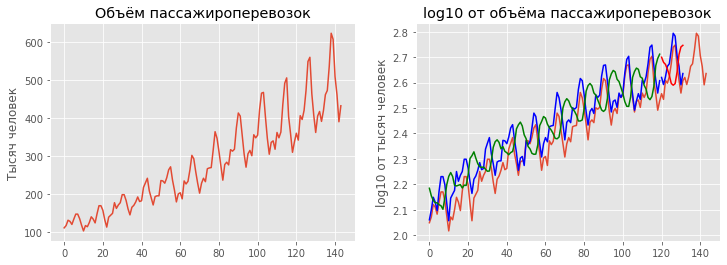

In [8]:
#Нейронные сети: прогнозирование логарифмов
ser_g = pd.read_csv('series_g.csv', sep=';', header=0)

#Мультипликативная сезонность. Потому добавляем логарифм, который превращает произведение в сумму
ser_g['log_y'] = np.log10(ser_g['series_g'])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ser_g['series_g'].plot(ax=ax1)
ax1.set_title(u'Объём пассажироперевозок')
ax1.set_ylabel(u'Тысяч человек')

ax2 = fig.add_subplot(122)
pd.Series(ser_g['log_y']).plot(ax=ax2)
ax2.set_title(u'log10 от объёма пассажироперевозок')
ax2.set_ylabel(u'log10 от тысяч человек')

# Преобразуем данные: 12 предикторов(помесяцам), 1 отклик
ser_g_2 = pd.DataFrame()
for i in range(12,0,-1):
    ser_g_2['t-'+str(i)] = ser_g.iloc[:,2].shift(i)
ser_g_2['t'] = ser_g.iloc[:,2].values

#Отрезаем первые 12 строк
ser_g_4 = ser_g_2[12:]

#Задаем предикторы и отклик 
y = ser_g_4['t']
X = ser_g_4.drop('t', axis=1)

X_train = X[:120]
y_train = y[:120]
X_test  = X[120:]
y_test  = y[120:]

#numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#Обучаем
model = Sequential()
model.add(Dense(8, input_dim=12, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])
model.fit(X_train, y_train, epochs=300, batch_size=None)

#оценка качества модели на тестовом
scores = model.evaluate(X_test, y_test)
print("\nMAPE: %.2f%%" % (scores[1]))

#прогноз
predictions = model.predict(X_test)

#подгонка
predictions_train = model.predict(X_train)

#Результаты
x2 = np.arange(0, 120, 1)
x3 = np.arange(120, 132, 1)

#График позволяет увидеть, насколько точна модель и ее прогноз
plt.plot(x2, y_train, color='blue')
plt.plot(x2, predictions_train, color='green')
plt.plot(x3, y_test, color='blue')
plt.plot(x3, predictions, color='red')


In [ ]:
#Вычисление статистической погрешности для случайной выборки

#Расчет объема выборки
N = 40000 #Генеральная совокупность
P = 0.95 #Доверительный уровень в 95% 
Z = 1.96 #коэффициент доверительного уровня (p = 95%, Z=1,96)(p=99%,   Z=2,58)
p = 0.5 #доля респондентов с  наличием исследуемого признака,
q = (1 - p) #доля респондентов, у которых исследуемый признак отсутствует,
delta = 0.05 #Задаваемая предельная ошибка выборки.
n = (Z**2)*p*q/delta**2 #объем выборки

print("Рекомендуемый объем выборки для данной аудитории:", int(n), "человек")

In [ ]:
#Расчет ошибки выбоки для доли признака
#Случай 1. Генеральная совокупность значительно больше выборки
n = 384 #Объем выборки
m = 276 #Число объектов выборки с нужными параметрами (True)
p = m/n #Вероятность на основе практических данных
sigma = n/2*((p*(1-p)/n*(1-n/N)))**0.5 
print('Результат выборки один составит: ', \
      float("{0:.1f}".format(p*100)), "±", float("{0:.1f}".format(sigma)), "%")

#Случай 2. Генеральная совокупность сопоставима с объемом выборки
N = 2500
delta = Z*((p*q/n)*((N-n)/(N-1)))**0.5 
print("Точность результатов выборки два составит: ", "±", float("{0:.1f}".format(delta*100)), "%")

In [ ]:
#Рассчет доверительного интервала
P = 0.99 #Доверительный уровень в 99% 
Z = 2.58 #коэффициент доверительного уровня 
p = 0.2 #доля респондентов с наличием исследуемого признака,
q = (1 - p) #доля респондентов, у которых исследуемый признак отсутствует,
n = 1000 #Объем выборки

sigma = Z*(p*q/n)**0.5 #Погрешность оценки

print('Точность результатов конкретной выборки составит: ±', float("{0:.2f}".format(sigma*100)), "%")
print('Доверительный интервал составит:', float("{0:.2f}".format((p - sigma)*100)), "% ;", \
                                            float("{0:.2f}".format((p + sigma)*100)), "%")

In [ ]:
#Ненормальные распределения
#Сгладить распределение, уменьшив шкалу на основании полезности данных, удалив аномалии
#Логарифмировать переменные (не забываем про ноль в исходной переменной). Схлопывает экстремальные значения
#Логарифмирование отлично работает с ассиметричными распределениями
#Если логарифмы переменных зависимы линейно, то значит сами переменные зависят нелинейно 
#Применить непараметрический критерий (ранговое распределение)
#Преобразование Бокса-Кокса подбирает оптимальную степень для возведения в нее mathworks.com/help/finance/boxcox.html 
#Bootstrap и метод Монте-Карло. Сравнивать медиану, мин, макс, 13-процентиль, среднее

* Проверка гипотезы о нормальности распределения.<br>
H0: $X \sim N(\cdot, \cdot)$<br>
H1: $X \nsim N(\cdot, \cdot)$<br>
Критерий Шапиро-Уилка [scipy.stats.shapiro](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.shapiro.html).<br>


* Критерий согласия Стьюдента.<br>
H0: $\mu = M$<br>
H1: $\mu \ne M$<br>
[scipy.stats.ttest_1samp](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_1samp.html).<br>


* Проверка гипотезы о равенстве средних значений.<br>
H0: $\mu_1 = \mu_2$<br>
H1: $\mu_1 \ne \mu_2$<br>
Распределение выборок должно быть близко к нормальному.<br>
  * Для несвязных выборок: [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html).<br>
  * Для связных выборок: [scipy.stats.ttest_rel](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_rel.html).<br>
  

* Проверка гипотезы о равенстве медиан.<br>
  * Для несвязных выборок: критерий Манна-Уитни [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html).<br>
  * Для связных выборок: критерий Уилкоксона [scipy.stats.wilcoxon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html).<br>
  * Критерий Муда [scipy.stats.median_test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html).<br>


* Проверка гипотезы о равенстве дисперсий.<br>
H0: $\sigma_1 = \sigma_2$<br>
H1: $\sigma_1 \neq \sigma_2$<br>
Критерий Флингера-Килина [scipy.stats.fligner](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.fligner.html).<br>


* Проверка гипотезы о равенстве долей категориального признака.<br>
H0: $p_1 = p_2$<br>
H1: $p_1 \ne p_2$<br>
Критерий хи-квадрат [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.chi2_contingency.html).<br>


* Проверка гипотезы о независимости (корреляция).<br>
H0: X и Y независимы<br>
H1: X и Y зависимы<br>
  * Для непрерыных величин: корреляция Пирсона [scipy.stats.pearsonr](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html),<br>
  * Для дискретных величин: корреляция Спирмэна [scipy.stats.kendalltau](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kendalltau.html).<br>
